<a href="https://colab.research.google.com/github/Akashh30/CyberSecurity/blob/main/Intrusion_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# New section

In [ ]:
#This file contains the names and descriptions of the columns (features) in the dataset.
with open("kddcup.names",'r') as f:
  print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [ ]:
# List of column names
cols ="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

In [ ]:
print(cols)

duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate


In [ ]:
# Splitting this cols string by commas and removing any leading or trailing whitespace
# using strip() and appending the cleaned column names to the columns list.
columns =[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

# Added 'target' column to the list of column names
columns.append('target')
print(len(columns))

42


In [ ]:
# This file contains various attack types
with open("training_attack_types",'r') as f:
  print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [ ]:
# This dictionary maps specific attack types to broader categories
attack_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [ ]:
print(attack_types)

{'normal': 'normal', 'back': 'dos', 'buffer_overflow': 'u2r', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'ipsweep': 'probe', 'land': 'dos', 'loadmodule': 'u2r', 'multihop': 'r2l', 'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 'phf': 'r2l', 'pod': 'dos', 'portsweep': 'probe', 'rootkit': 'u2r', 'satan': 'probe', 'smurf': 'dos', 'spy': 'r2l', 'teardrop': 'dos', 'warezclient': 'r2l', 'warezmaster': 'r2l'}


In [ ]:
# Reading the main dataset
# The names parameter is used to specify the column names
df = pd.read_csv('kddcup.data_10_percent_corrected',names = columns)
#df['Attack Type'] = df.target.apply(lambda r:attack_types[r[:-1]])
df['Attack Type'] = df.target.astype(str).apply(lambda r: attack_types.get(r[:-1], 'unknown'))
# Adding a new column 'Attack Type' to our DataFrame
# It takes the values from the 'target' column and converts them to strings

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [ ]:
# Dropping null values
#df.dropna(inplace=True)

In [ ]:
# Checking presence of null values
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
df['target'].value_counts()

normal.             39298
smurf.              11258
neptune.             2185
back.                2002
ipsweep.              658
nmap.                 130
teardrop.              99
guess_passwd.          53
portsweep.             40
pod.                   20
ftp_write.              8
multihop.               5
buffer_overflow.        3
satan.                  2
land.                   1
perl.                   1
imap.                   1
phf.                    1
loadmodule.             1
Name: target, dtype: int64

In [ ]:

df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:

df.shape

(55767, 43)

In [ ]:
# Information about target column
df['target'].value_counts()

normal.             39298
smurf.              11258
neptune.             2185
back.                2002
ipsweep.              658
nmap.                 130
teardrop.              99
guess_passwd.          53
portsweep.             40
pod.                   20
ftp_write.              8
multihop.               5
buffer_overflow.        3
satan.                  2
land.                   1
perl.                   1
imap.                   1
phf.                    1
loadmodule.             1
Name: target, dtype: int64

In [ ]:
# Information about Attack Type column
df['Attack Type'].value_counts()

normal     39298
dos        15565
probe        830
r2l           68
u2r            5
unknown        1
Name: Attack Type, dtype: int64

In [ ]:
# num_cols will have numeric columns
# cat_cols will have numeric columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(df.columns)-set(num_cols))

In [ ]:
print(num_cols)

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


In [ ]:
print(cat_cols)

['target', 'service', 'protocol_type', 'flag', 'Attack Type']


# **Visualizations**

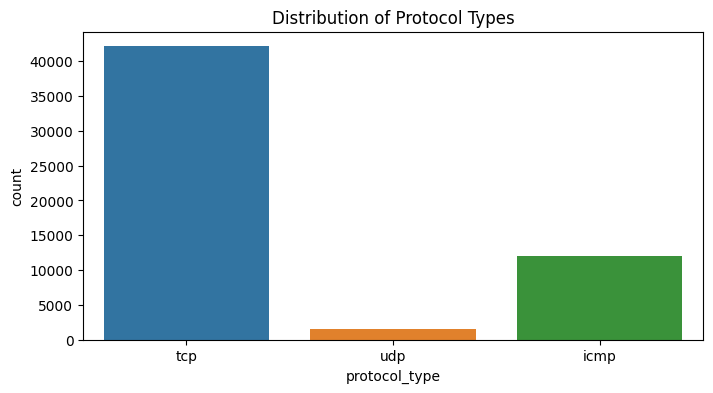

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='protocol_type', data=df)
plt.title('Distribution of Protocol Types')
plt.show()


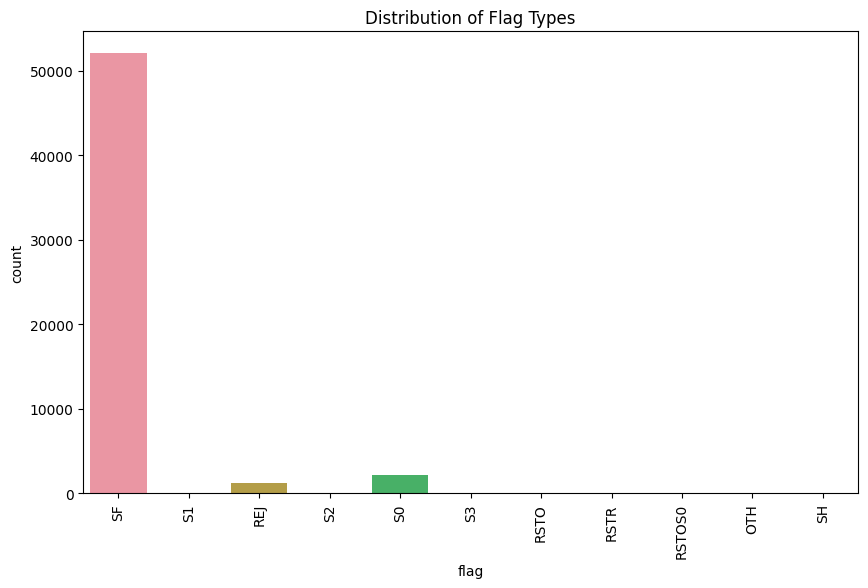

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='flag', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Flag Types')
plt.show()


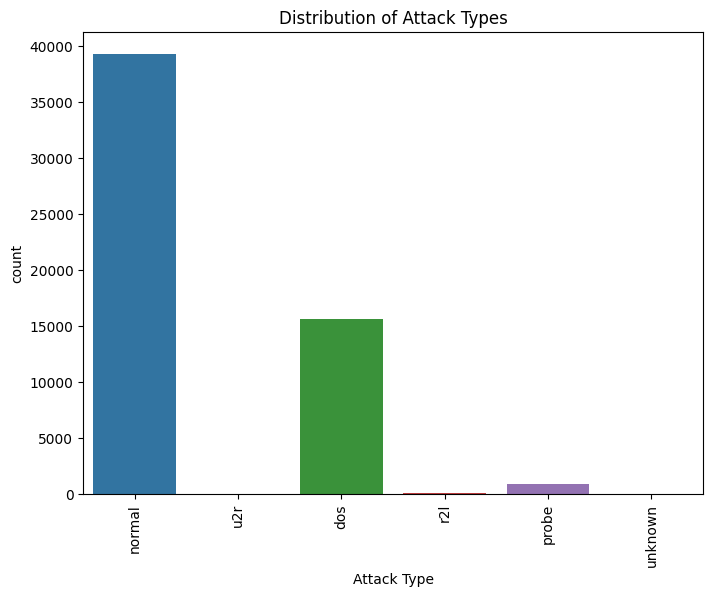

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Attack Type', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Attack Types')
plt.show()

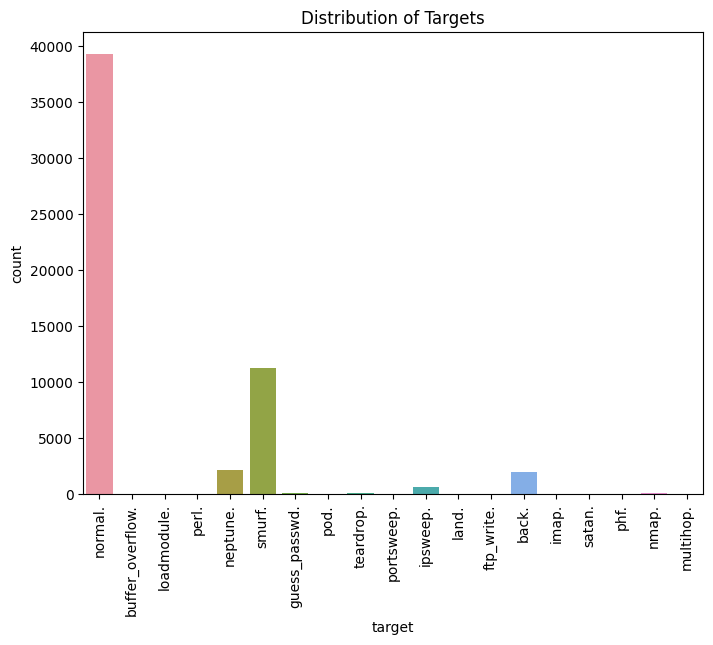

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Targets')
plt.show()


In [ ]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

# **Feature Mapping**

In [ ]:
df.drop(['num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_srv_serror_rate',
         'dst_host_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
         'dst_host_same_srv_rate','service'], axis=1, inplace=True)

In [ ]:
# Map categorical features to numerical values
protocol_map = {'icmp': 0, 'tcp': 1, 'udp': 2}
df['protocol_type'] = df['protocol_type'].map(protocol_map)

flag_map = {'SF': 0, 'S0': 1, 'REJ': 2, 'RSTR': 3, 'RSTO': 4, 'SH': 5, 'S1': 6, 'S2': 7, 'RSTOS0': 8, 'S3': 9, 'OTH': 10}
df['flag'] = df['flag'].map(flag_map)

In [ ]:
# Split data into features (X) and target (y)
y = df["Attack Type"]
X = df.drop(["target", "Attack Type"], axis=1)

# Feature Scaling (MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

# Model Building - Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf.fit(X_train, y_train)

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy)

0.9905230421954646


In [ ]:
df.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [ ]:
import joblib
joblib.dump(clf, 'intrusion_detection_model.pkl')

['intrusion_detection_model.pkl']

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
import joblib

# Save the logistic regression model
joblib.dump(log_reg, 'intrusion_detection_logistic_regression_model.pkl')


['intrusion_detection_logistic_regression_model.pkl']

In [ ]:
half

In [ ]:
num_rows_to_drop = int(0.3 * len(df))

# Drop approximately 50% of the rows randomly
df_thirty = df.sample(frac=0.3, random_state=42)  # You can adjust the random_state if needed

# Print the resulting DataFrame
print(df_thirty)

       duration  protocol_type  flag  src_bytes  dst_bytes  land  \
52332         0              0     0          8          0     0   
15695         0              1     0       1782        332     0   
53972         0              1     1          0          0     0   
23400         0              1     0        222       2483     0   
34656         0              1     0        182       8673     0   
...         ...            ...   ...        ...        ...   ...   
51153         0              1     0      54540       8314     0   
35552        28              1     0        329       1063     0   
26280         0              1     0        205       5757     0   
46284         0              0     0       1032          0     0   
47514         0              0     0       1032          0     0   

       wrong_fragment  urgent  hot  num_failed_logins  ...  same_srv_rate  \
52332               0       0    0                  0  ...           1.00   
15695               0       0

In [ ]:
r_drop= int(0.2 * len(df))

# Drop approximately 50% of the rows randomly
df_twenty = df.sample(frac=0.2, random_state=0)  # You can adjust the random_state if needed

# Print the resulting DataFrame
print(df_twenty)

       duration  protocol_type  flag  src_bytes  dst_bytes  land  \
41628         0              1     0      40494          0     0   
28575         0              1     0        315        535     0   
50619         0              0     0       1032          0     0   
38885         0              1     0        213      16058     0   
38209         0              1     0        205        480     0   
...         ...            ...   ...        ...        ...   ...   
36810         0              1     0        224       1584     0   
23879         0              1     0        237        834     0   
10851         0              0     0       1032          0     0   
39272         0              1     0        309       1905     0   
20616         0              1     0        223       6534     0   

       wrong_fragment  urgent  hot  num_failed_logins  ...  same_srv_rate  \
41628               0       0    0                  0  ...            1.0   
28575               0       0

In [ ]:
df_five = df.sample(frac=0.05, random_state=42)  # You can adjust the random_state if needed

# Print the resulting DataFrame
print(df_five)

       duration  protocol_type  flag  src_bytes  dst_bytes  land  \
52332         0              0     0          8          0     0   
15695         0              1     0       1782        332     0   
53972         0              1     1          0          0     0   
23400         0              1     0        222       2483     0   
34656         0              1     0        182       8673     0   
...         ...            ...   ...        ...        ...   ...   
54084         0              1     1          0          0     0   
6483          0              1     0        287       3491     0   
2668          0              1     0        288      21778     0   
52704         0              2     0         45         45     0   
36139         0              1     0        198       1550     0   

       wrong_fragment  urgent  hot  num_failed_logins  ...  same_srv_rate  \
52332               0       0    0                  0  ...           1.00   
15695               0       0

In [ ]:
df_five['Attack Type'].value_counts()

normal    1991
dos        750
probe       46
r2l          1
Name: Attack Type, dtype: int64

In [ ]:
df_five.to_csv('five_percent.csv')

In [ ]:
df_twenty.to_csv('twenty_percent.csv')

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# Calculate the number of rows to drop (50% of the total number of rows)
num_rows_to_drop = int(0.5 * len(df))

# Drop approximately 50% of the rows randomly
df_dropped = df.sample(frac=0.5, random_state=42)  # You can adjust the random_state if needed

# Print the resulting DataFrame
print(df_dropped)


        duration  protocol_type  flag  src_bytes  dst_bytes  land  \
317921         0              0     0       1032          0     0   
171422         0              0     0       1032          0     0   
312181         0              0     0       1032          0     0   
87346          0              1     0        345       5419     0   
57449          0              1     1          0          0     0   
...          ...            ...   ...        ...        ...   ...   
310767         0              0     0       1032          0     0   
204892         0              0     0       1032          0     0   
137579         0              1     0        306       5373     0   
136773         0              1     0        232       2698     0   
425461         0              0     0        520          0     0   

        wrong_fragment  urgent  hot  num_failed_logins  ...  same_srv_rate  \
317921               0       0    0                  0  ...           1.00   
171422         

In [ ]:
df_twenty['Attack Type'].value_counts()

normal    7832
dos       3148
probe      162
r2l         11
Name: Attack Type, dtype: int64

In [ ]:
df_dropped.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [ ]:
df_dropped['Attack Type'].value_counts()

dos       195776
normal     48649
probe       2007
r2l          554
u2r           24
Name: Attack Type, dtype: int64

In [ ]:
df_dropped['target'].value_counts()

smurf.              140543
neptune.             53521
normal.              48649
back.                 1097
satan.                 762
ipsweep.               618
portsweep.             517
warezclient.           511
teardrop.              487
pod.                   118
nmap.                  110
guess_passwd.           24
buffer_overflow.        15
warezmaster.            10
land.                   10
rootkit.                 4
imap.                    4
loadmodule.              3
multihop.                2
ftp_write.               2
perl.                    2
phf.                     1
Name: target, dtype: int64

In [ ]:
df_dropped.isnull().sum()

duration                       0
protocol_type                  0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
rerror_rate                    0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_diff_srv_rate         0
dst_host_s

In [ ]:
#df = df.dropna('columns')# drop columns with NaN
df = df[[col for col in df if df[col].nunique() > 1]]

In [ ]:
pmap = {'icmp':0, 'tcp':1, 'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [ ]:
# flag feature mapping
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [ ]:
df.drop('service', axis = 1, inplace = True)

In [ ]:
df.shape

(6997, 35)

In [ ]:
df.drop('num_root', axis = 1, inplace = True)

df.drop('srv_serror_rate', axis = 1, inplace = True)

df.drop('srv_rerror_rate', axis = 1, inplace = True)

df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

df.drop('dst_host_serror_rate', axis = 1, inplace = True)

df.drop('dst_host_rerror_rate', axis = 1, inplace = True)

df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)

In [ ]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,hot,logged_in,num_compromised,root_shell,num_file_creations,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,1,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,1,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,1,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,1,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,1,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [ ]:
df['Attack Type'].value_counts()

normal     6992
u2r           4
unknown       1
Name: Attack Type, dtype: int64

In [ ]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
hot                              int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count                   int64
dst_host_srv_count               int64
dst_host_diff_srv_rate         float64
dst_host_same_src_port_rate    float64
dst_host_srv_diff_host_rate    float64
target                   

# **Modelling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
df = df.drop(['target', ], axis = 1)
print(df.shape)

(6997, 26)


In [ ]:
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(5597, 25) (1400, 25)
(5597, 1) (1400, 1)


In [ ]:
df=df.dropna()
df.shape

(6997, 26)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

model1.fit(X_train, Y_train.values.ravel())



Y_test_pred1 = model1.predict(X_test)


print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))


Train score is: 0.9998213328568876
Test score is: 0.9992857142857143


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=30)
model2.fit(X_train, Y_train.values.ravel())
Y_test_pred2 = model2.predict(X_test)
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9998213328568876
Test score is: 0.9992857142857143


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Creating the Logistic Regression model
model3 = LogisticRegression(max_iter=1000)  # You can adjust max_iter as needed

# Fitting the model on the training data
model3.fit(X_train, Y_train.values.ravel())

# Predicting on test data
Y_test_pred3 = model3.predict(X_test)

# Calculating the accuracy score on both training and test sets
train_accuracy = accuracy_score(Y_train, model3.predict(X_train))
test_accuracy = accuracy_score(Y_test, Y_test_pred3)

print("Train accuracy is:", train_accuracy)
print("Test accuracy is:", test_accuracy)

Train accuracy is: 0.9996426657137752
Test accuracy is: 0.9992857142857143


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Creating the SVM classifier
model4 = SVC(kernel='linear', C=1.0)  # You can adjust the kernel and C parameter as needed

# Fitting the model on the training data
model4.fit(X_train, Y_train.values.ravel())

# Predicting on the test data
Y_test_pred4 = model4.predict(X_test)

# Calculating the accuracy score on both training and test sets
train_accuracy = accuracy_score(Y_train, model4.predict(X_train))
test_accuracy = accuracy_score(Y_test, Y_test_pred4)

print("Train accuracy is:", train_accuracy)
print("Test accuracy is:", test_accuracy)

Train accuracy is: 0.9998213328568876
Test accuracy is: 0.9992857142857143


In [ ]:
import pickle

# Replace 'model' with your trained model
# Example: model = RandomForestClassifier()
# Make sure your model is already trained before saving it
# You can replace 'model' with your actual trained model object
model = model3

# Specify the file path where you want to save the model
# Replace 'your_model_file.pkl' with your desired file name
model_file_path = 'IDS_Model.pkl'

# Save the model to a .pkl file
with open(model_file_path, 'wb') as model_file:
    pickle.dump(model, model_file)


In [ ]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
hot                              int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count                   int64
dst_host_srv_count               int64
dst_host_diff_srv_rate         float64
dst_host_same_src_port_rate    float64
dst_host_srv_diff_host_rate    float64
Attack Type              

In [ ]:
X

array([[0.  , 0.5 , 0.  , ..., 0.  , 0.11, 0.  ],
       [0.  , 0.5 , 0.  , ..., 0.  , 0.05, 0.  ],
       [0.  , 0.5 , 0.  , ..., 0.  , 0.03, 0.  ],
       ...,
       [0.  , 0.5 , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.5 , 0.  , ..., 0.  , 0.01, 0.  ],
       [0.  , 0.5 , 0.  , ..., 0.  , 0.  , 0.  ]])

In [ ]:
df.drop(columns=['Attack Type'],inplace=True)

In [ ]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
hot                              int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count                   int64
dst_host_srv_count               int64
dst_host_diff_srv_rate         float64
dst_host_same_src_port_rate    float64
dst_host_srv_diff_host_rate    float64
dtype: object

In [ ]:
df.to_csv('IDS.csv')